# Business Understanding

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido.

# Data Understanding

## Setup

In [18]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

# Selecao e validacao de modelos
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# Pre processamento
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Modelos
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Deploy
import pickle

# Manter saída do processamento como Dataframe Pandas
from sklearn import set_config
set_config(transform_output='pandas')

In [19]:
def get_metrics(y_true, y_pred):
    """Calcula as metricas para avaliacao do modelo"""
    dict_metrics = {
        'R2': metrics.r2_score(y_true, y_pred),
        'MAE': metrics.mean_absolute_error(y_true, y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_true, y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    }
    return dict_metrics

## Dataset

In [20]:
# Carregando o dataset
df = pd.read_csv('..\Data\desafio_indicium_imdb.csv', index_col=['Unnamed: 0'])
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


## EDA

In [21]:
# Verificando dados nulos
df.isna().sum().sort_values(ascending=False)

Gross            169
Meta_score       157
Certificate      101
Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
dtype: int64

In [22]:
# Verificando dados duplicados
df.duplicated().sum()

0

In [23]:
# Visualização dos tipos dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB


In [24]:
# Removendo os 'min' da coluna Runtime, já que todos os tempos estão em minutos
df['Runtime'] = df['Runtime'].str.replace('min', '')

In [25]:
# Tirando as virgulas da coluna Gross, para ser entendido como numero
df['Gross'] = df['Gross'].str.replace(',','')

In [26]:
# Verificando os anos da coluna Released Year, percebe-se que tem um ano escrito PG, portanto irei remover
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1937     1
1936     1
1924     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [27]:
# Verificando a linha incorreta
df.query('Released_Year == "PG"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [28]:
# Substituindo o ano de lançamento do filme Apollo 13 pelo seu ano correto (1995)
df['Released_Year'] = df['Released_Year'].str.replace('PG', '1995')

In [29]:
df.query('Series_Title == "Apollo 13"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
966,Apollo 13,1995,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933


In [30]:
# Transformando os tipos dos dados. Os demais poderiam ser transformados também, retirando da classe objeto para ocupar menos espaço, mas como o dataset é pequeno vou manter
df = df.astype({'Released_Year' : 'int', 'Runtime' : 'int', 'Gross' : 'float'})

In [31]:
df.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [32]:
# Descricão estatística dos dados
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,999.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.218218,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.297166,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


<Axes: xlabel='IMDB_Rating', ylabel='Count'>

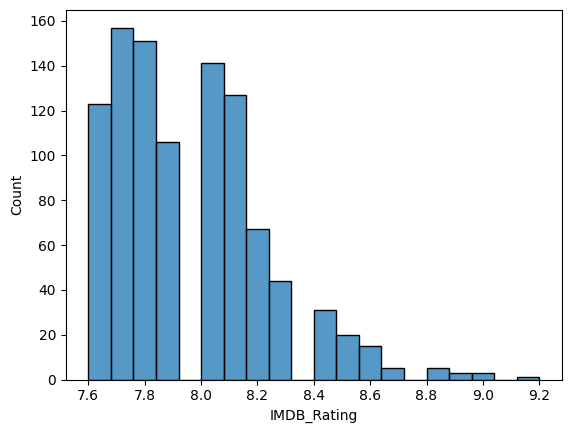

In [33]:
# Visualizando a distribuição das notas do IMDB, observando uma concentração maior em notas proximas a 8.0, com poucos filmes com notas acima de 9
sns.histplot(data= df, x= 'IMDB_Rating')

In [34]:
# Avaliando o genero e nota do IMDB
df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).reset_index()

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
...,...,...
197,"Adventure, Comedy, War",7.60
198,"Animation, Comedy, Crime",7.60
199,"Action, Adventure, Family",7.60
200,"Animation, Drama, Romance",7.60


Analisando os gêneros dos filmes, percebe-se que filmes de Drama estão entre os mais bem rankeados

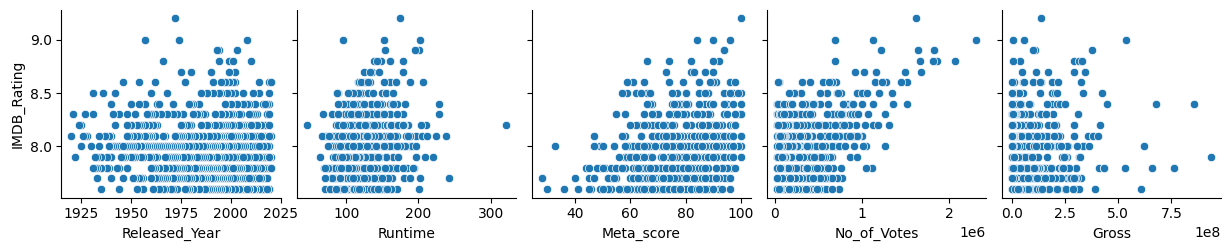

In [35]:
# Relação da nota do IMDB com as demais variáveis
sns.pairplot(data=df, x_vars= ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross'], y_vars=['IMDB_Rating']);

Tirando o número de votos e o meta score, o restante parece não oferecer conclusões concretas com relação a notas altas no IMDb.

# Recommendation -> Non-personalized

Qual filme você recomendaria para uma pessoa que você não conhece?

Levando em consideração que não conhecemos a pessoa, não é possível atribuir características como gêneros ou atores preferidos.
Dessa forma, a recomendação será do tipo não personalizada, recomendando apenas os melhores filmes segundo a nota do IMDB ou Meta Score

In [36]:
# Recomendando os 15 melhores filmes segundo a nota do IMDB
df_top_movies_imdb = (
    df
    .groupby('Series_Title')['IMDB_Rating']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
  )
df_top_movies_imdb

,Series_Title,IMDB_Rating
0,The Godfather,9.2
1,The Godfather: Part II,9.0
2,The Dark Knight,9.0
3,12 Angry Men,9.0
4,Schindler's List,8.9
5,Pulp Fiction,8.9
6,The Lord of the Rings: The Return of the King,8.9
7,Fight Club,8.8
8,Forrest Gump,8.8
9,Inception,8.8


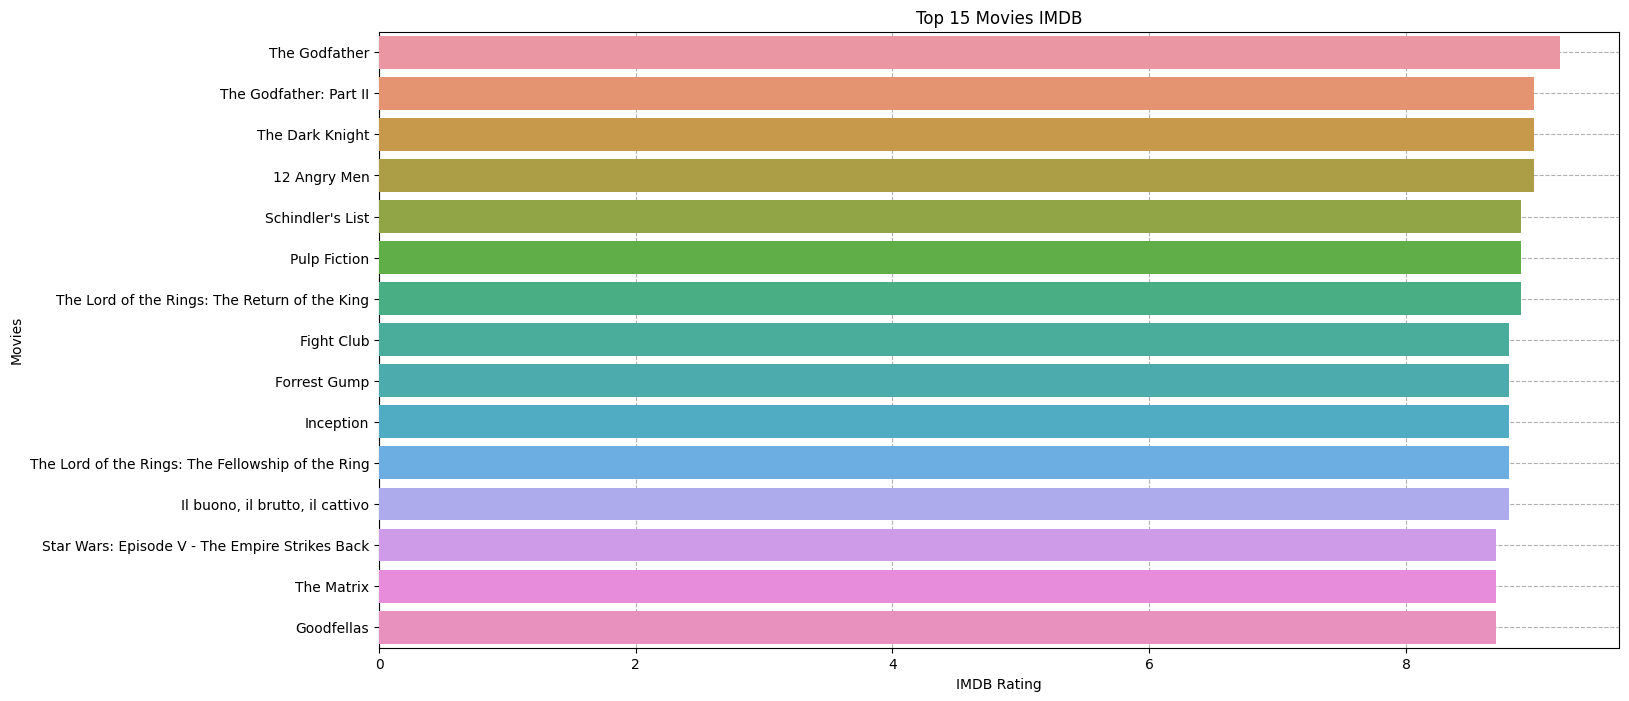

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,8))
sns.barplot(data=df_top_movies_imdb, x='IMDB_Rating', y='Series_Title', ax=ax, zorder=3)
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Movies')
ax.set_title(f'Top {df_top_movies_imdb.shape[0]} Movies IMDB')
ax.grid(True, linestyle='--', zorder=0)

In [38]:
# Da mesma forma, para o Meta Score
df_top_movies_meta = (
    df
    .groupby('Series_Title')['Meta_score']
    .mean()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
  )
df_top_movies_meta


,Series_Title,Meta_score
0,Sweet Smell of Success,100.0
1,Il conformista,100.0
2,Vertigo,100.0
3,Fanny och Alexander,100.0
4,Rear Window,100.0
5,Citizen Kane,100.0
6,Notorious,100.0
7,Boyhood,100.0
8,Trois couleurs: Rouge,100.0
9,Casablanca,100.0


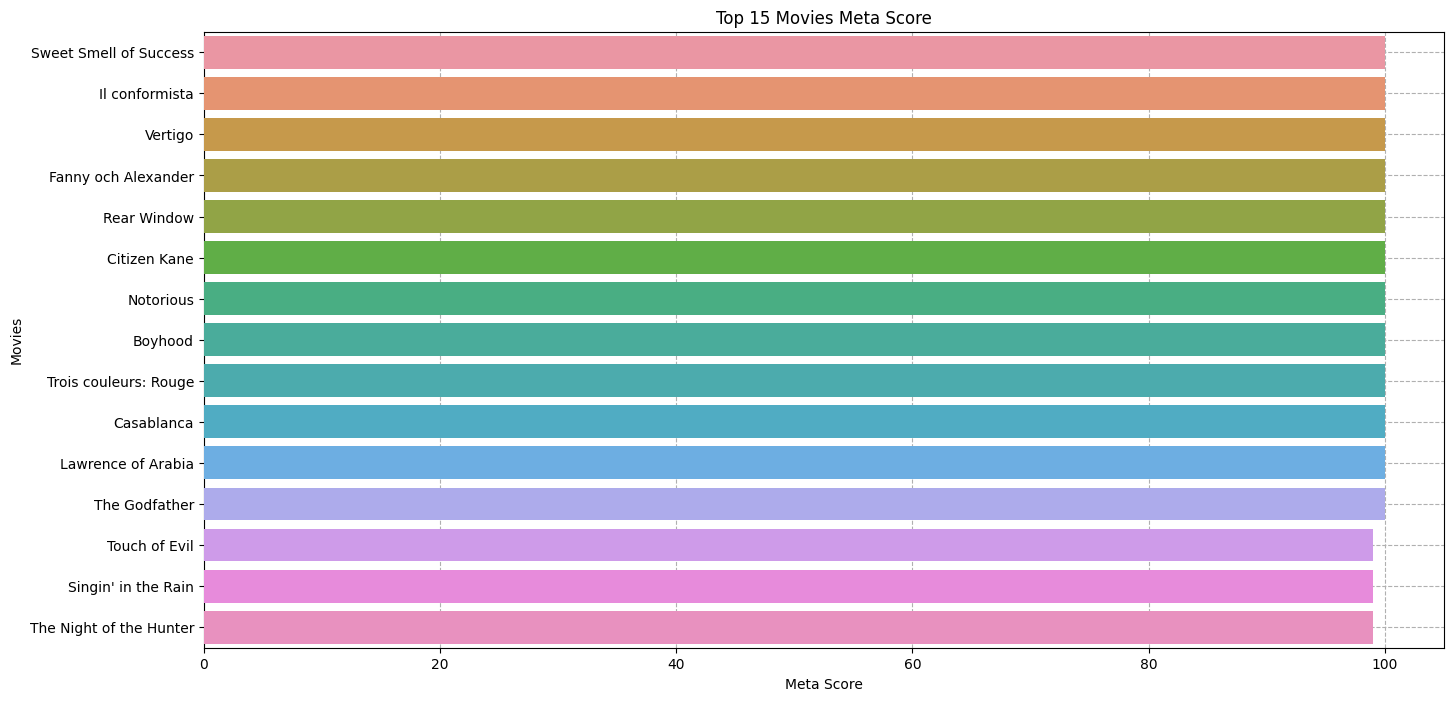

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (16,8))
sns.barplot(data=df_top_movies_meta, x='Meta_score', y='Series_Title', ax=ax, zorder=3)
ax.set_xlabel('Meta Score')
ax.set_ylabel('Movies')
ax.set_title(f'Top {df_top_movies_meta.shape[0]} Movies Meta Score')
ax.grid(True, linestyle='--', zorder=0)

# Gross

Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

In [40]:
# Como vamos analisar os fatores relevantes para a coluna Gross (faturamento), não faz sentido analisar os dados nulos dessa coluna, portanto irei dropar
df.dropna(inplace=True)

In [41]:
df_corr = df[['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']].corr()
df_corr

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.017914,-0.178662,-0.272658,0.200079,0.234495
Runtime,-0.017914,1.000000,0.257640,-0.005948,0.212927,0.169380
IMDB_Rating,-0.178662,0.257640,1.000000,0.283745,0.609239,0.130857
Meta_score,-0.272658,-0.005948,0.283745,1.000000,0.028578,-0.014663
No_of_Votes,0.200079,0.212927,0.609239,0.028578,1.000000,0.560955
Gross,0.234495,0.169380,0.130857,-0.014663,0.560955,1.000000


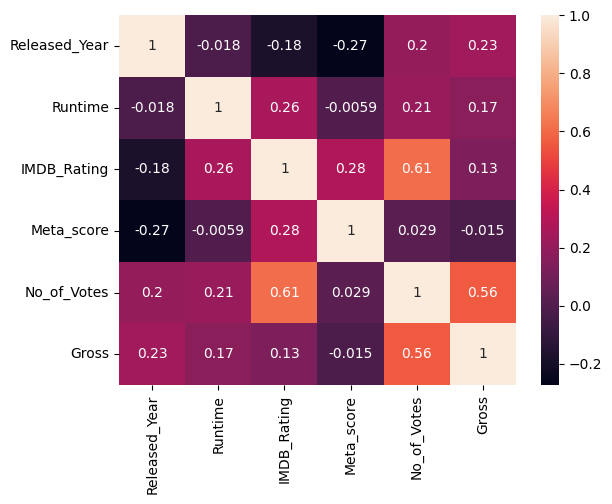

In [42]:
sns.heatmap(df_corr, annot=True);

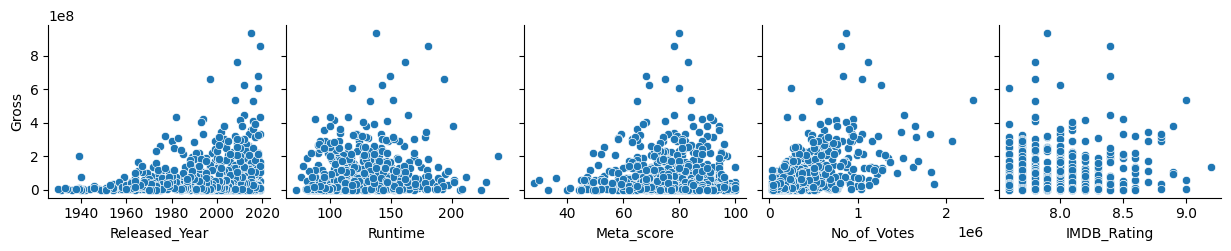

In [43]:
# Relação do faturamento
sns.pairplot(data=df, x_vars= ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'IMDB_Rating'], y_vars=['Gross']);

Como observado, a variável que mais tem relação com o faturamento é o número de votos. O ano de lançamento não se pode afirmar que tem relação forte com o faturamento, uma vez que não está sendo considerado a inflação, dessa forma o valor monetário varia muito conforme o tempo e é bem provavel que filmes atuais lucrem mais que filmes da decada de 40 ou 50. Outro fator que pode influenciar o lucro é o ator, geralmente filmes com atores que já são famosos tendem a lucrar mais, mas não é uma regra.

# Overview

Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

A partir da coluna Overview podemos saber do que se trata o filme, assim como seu gênero, dando uma ideia inicial se a pessoa iria se interessar pelo filme ou não a partir da descrição do filme

In [44]:
df['Overview']

1      An organized crime dynasty's aging patriarch t...
2      When the menace known as the Joker wreaks havo...
3      The early life and career of Vito Corleone in ...
4      A jury holdout attempts to prevent a miscarria...
5      Gandalf and Aragorn lead the World of Men agai...
                             ...                        
990    A low-life bandit and an I.R.A. explosives exp...
991    A group of U.S. soldiers sneaks across enemy l...
992    Bagheera the Panther and Baloo the Bear have a...
994    Over two "typical" days in the life of The Bea...
997    In Hawaii in 1941, a private is cruelly punish...
Name: Overview, Length: 713, dtype: object

# IMDB Rating

- Para fazer a previsão da nota do IMDB um modelo de regressão faria mais sentido, tratando a nota como uma quantidade a ser estimada, já na classificação iriamos predizer a classe de um número e as classes tem uma ordem inerente. 

- Nas variáveis númericas irei utilizar o MinMaxScaler para padronizar os valores para que o modelo consiga entender todos de forma 'igual', pois quando alguns numeros são muito grandes o modelo pode pensar que são mais importantes, o que muitas vezes não é verdade.

- Para as categóricas será utilizado o OneHotEncoder, a fim de transformar os valores em números para serem entendidos pelo modelo. Utilizei o OneHot ao invés do LabelEnconder, pois o Label é mais utilizado quando são variáveis categóricas ordinais. Não irei utilizar a coluna Series_Title, pois acredito que não faria diferença saber o nome do filme para o modelo estimar a nota do IMDB.

- O modelo que melhor performou foi o Random Forest Regressor, que nada mais é que um método ensemble, ou seja, a combinação de diferentes modelos para se obter um único resultado. Um ponto negativo é que esses algoritmos são mais robustos e complexos, levando a um maior custo computacional que costuma ser acompanhando de melhores resultados. Já nos pontos positivos, temos que o modelo pode ser utilizado com variáveis categóricas e numéricas e não sofre tanta influência de outliers.

- A medida de performance escolhida foi o R2 (coeficiente de determinação) que indica o quanto a linha de regressão se ajusta aos dados. A interpretação do R2 permite analisar a utilidade do modelo em fazer predições precisas.

In [45]:
# Separando as variaveis categoricas e numericas
NUMERICAL_FEATURES = ['Released_Year', 'Runtime', 'Meta_score', 'No_of_Votes', 'Gross']
CATEGORICAL_FEATURES = ['Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'IMDB_Rating'

In [46]:
X = df[FEATURES]
y = df[TARGET]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [47]:
# Criando as transformações, MinMaxScaler para as variaveis numericas e OneHotEncoder para as categoricas
numerical_transformer = MinMaxScaler()

categorical_transformer = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [48]:
# Aplicando as transformacoes nos dados
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, NUMERICAL_FEATURES),
    ('cat', categorical_transformer, CATEGORICAL_FEATURES)
])

preprocessor.fit_transform(X_train)

,num__Released_Year,num__Runtime,num__Meta_score,num__No_of_Votes,num__Gross,cat__Certificate_A,cat__Certificate_Approved,cat__Certificate_G,cat__Certificate_PG,cat__Certificate_PG-13,...,cat__Star4_Wolfgang Lukschy,cat__Star4_Wotan Wilke Möhring,cat__Star4_Xolani Mali,cat__Star4_Yukiko Shimazaki,cat__Star4_Yun Qu,cat__Star4_Yvonne Furneaux,cat__Star4_Zac Mattoon O'Brien,cat__Star4_Zach Grenier,cat__Star4_Zoe Saldana,cat__Star4_Álvaro Guerrero
399,0.696629,0.108434,0.800000,0.153036,0.253211,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,0.876404,0.156627,0.928571,0.427814,0.260734,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327,0.966292,0.337349,0.914286,0.211013,0.176032,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.696629,0.783133,0.614286,0.026598,0.056116,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
771,0.898876,0.168675,0.585714,0.167117,0.233955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.887640,0.487952,0.557143,0.545495,0.140428,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.932584,0.650602,0.642857,0.510214,0.136187,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,0.640449,0.156627,0.671429,0.161839,0.035948,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
645,0.786517,0.289157,0.914286,0.100087,0.149210,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Criando a pipeline para testar os diferentes tipos de modelos
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DummyRegressor())
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Released_Year', 'Runtime',
                                                   'Meta_score', 'No_of_Votes',
                                                   'Gross']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Certificate', 'Genre',
                                                   'Overview', 'Director',
                                                   'Star1', 'Star2', 'Star3',
                                                   'Star4'])])),
                ('model', DummyRegressor())])

In [50]:
# Modelos que serao testados utilizando o GridSearch para obter o melhor entre eles
# Começando com o Dummy, pois ele faz um 'chute' da nota, então se nosso modelo performar pior que um chute, podemos dizer que não está bom
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor(random_state=42)
    ]
}

grid_model = GridSearchCV(model_pipeline, params, cv=3, scoring='r2', verbose=1)
grid_model.fit(X_train, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Anaconda3\envs\ml\lib\site-packa

In [51]:
# Mostrando o ranking dos melhores modelos
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')]

,param_model,params,mean_test_score,std_test_score
rank_test_score,,,,
1,RandomForestRegressor(random_state=42),{'model': RandomForestRegressor(random_state=42)},0.591851,0.027442
2,GradientBoostingRegressor(random_state=42),{'model': GradientBoostingRegressor(random_sta...,0.589270,0.024042
3,LassoCV(),{'model': LassoCV()},0.550436,0.010779
4,LinearRegression(),{'model': LinearRegression()},0.452647,0.004693
5,DummyRegressor(),{'model': DummyRegressor()},-0.008165,0.005559


In [52]:
# Buscando os melhores parametros para o modelo escolhido, RandomForestRegressor
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

params = {
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
}

grid_model = GridSearchCV(model_pipeline, params, cv=2, scoring='r2', n_jobs=-1, verbose=1)
grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['Released_Year',
                                                                          'Runtime',
                                                                          'Meta_score',
                                                                          'No_of_Votes',
                                                                          'Gross']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Certificate',
                                                                          'Genre',
                                                                          'Overview',
                                                                          'Director',
                                                                          'Star1',
                                                                          'Star2',
                                                                          'Star3',
                                                                          'Star4'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500]},
             scoring='r2', verbose=1)

In [53]:
# Ranking dos melhores parametros
df_cv_results = pd.DataFrame(grid_model.cv_results_).set_index('rank_test_score').sort_index()
df_cv_results.loc[:,~df_cv_results.columns.str.contains('split|time')].head()

,param_model__max_depth,param_model__n_estimators,params,mean_test_score,std_test_score
rank_test_score,,,,,
1,5,400,"{'model__max_depth': 5, 'model__n_estimators':...",0.531236,0.023163
2,5,500,"{'model__max_depth': 5, 'model__n_estimators':...",0.530221,0.022744
3,5,300,"{'model__max_depth': 5, 'model__n_estimators':...",0.530181,0.022759
4,4,400,"{'model__max_depth': 4, 'model__n_estimators':...",0.509345,0.024834
5,4,500,"{'model__max_depth': 4, 'model__n_estimators':...",0.508881,0.024329


In [54]:
# Escolhendo o melhor parametro
model_pipeline = grid_model.best_estimator_

In [55]:
# Predizendo os valores e pegando as metricas para avaliarmos o modelo
y_pred = model_pipeline.predict(X_test)
get_metrics(y_test,y_pred)

c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0, 1, 2, 3, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'R2': 0.5020162960237949,
 'MAE': 0.16429716290680335,
 'MAPE': 0.020572547376285357,
 'RMSE': 0.2045684783241851}

O modelo não obteve resultados muito precisos, o que pode ser resultado de uma baixa explicabilidade das variáveis utilizadas com relação a nota do IMDB.

# Test IMDb Rating

In [56]:
# Considerando o seguinte filme, predizendo a nota do imdb segundo o modelo
movie_test = {'Series_Title': 'The Shawshank Redemption',
 'Released_Year': 1994,
 'Certificate': 'A',
 'Runtime': 142,
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469}

df_test = pd.DataFrame(data = [movie_test])
df_test

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469


In [57]:
nota_imdb = model_pipeline.predict(df_test)
print('Nota do IMDB:', nota_imdb)

Nota do IMDB: [8.8015393]


c:\Anaconda3\envs\ml\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [2, 4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Deployment

In [66]:
# Salvando o modelo em .pkl
with open('..\Model\Modelo_rf', 'wb') as model_file:
    pickle.dump(model_pipeline, model_file)